In [1]:
print ('STEP 3: Exploratory Data Analysis')
print ('-----------------------------------------------')

STEP 3: Exploratory Data Analysis
-----------------------------------------------


In [3]:
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,Beef Kaldereta,Bibingka,Buko Salad,Crispy Pata,Embutido,Fruit Salad,Leche Flan,Morcon,Paella,Pancit Malabon
able,0,0,0,0,0,0,1,0,0,0
absorb,0,0,0,1,0,0,0,0,0,0
achievement,0,0,0,1,0,0,0,0,0,0
act,0,0,0,1,0,0,0,0,0,0
action,0,0,0,1,0,0,0,0,0,0


In [4]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Beef Kaldereta': [('beef', 13),
  ('kaldereta', 12),
  ('cooking', 9),
  ('liver', 9),
  ('tomato', 6),
  ('spread', 6),
  ('recipe', 5),
  ('used', 4),
  ('version', 4),
  ('using', 4),
  ('use', 4),
  ('dish', 4),
  ('sauce', 4),
  ('peanut', 3),
  ('meat', 3),
  ('cook', 3),
  ('think', 3),
  ('makes', 3),
  ('best', 3),
  ('ingredients', 3),
  ('add', 3),
  ('butter', 3),
  ('rice', 3),
  ('cooked', 2),
  ('utilized', 2),
  ('continue', 2),
  ('kalderetang', 2),
  ('check', 2),
  ('onion', 2),
  ('occasions', 2)],
 'Bibingka': [('rice', 8),
  ('bibingka', 5),
  ('clay', 5),
  ('flour', 4),
  ('oven', 4),
  ('cake', 4),
  ('time', 3),
  ('ordinary', 3),
  ('pot', 3),
  ('glutinous', 3),
  ('recipe', 3),
  ('traditional', 2),
  ('using', 2),
  ('placed', 2),
  ('way', 2),
  ('known', 2),
  ('alternative', 2),
  ('galapong', 2),
  ('mixture', 2),
  ('store', 1),
  ('special', 1),
  ('green', 1),
  ('consuming', 1),
  ('common', 1),
  ('street', 1),
  ('opportunity', 1),
  ('comments

In [6]:
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['beef',
 'kaldereta',
 'cooking',
 'liver',
 'tomato',
 'spread',
 'recipe',
 'used',
 'version',
 'using',
 'use',
 'dish',
 'sauce',
 'peanut',
 'meat',
 'cook',
 'think',
 'makes',
 'best',
 'ingredients',
 'add',
 'butter',
 'rice',
 'cooked',
 'utilized',
 'continue',
 'kalderetang',
 'check',
 'onion',
 'occasions',
 'rice',
 'bibingka',
 'clay',
 'flour',
 'oven',
 'cake',
 'time',
 'ordinary',
 'pot',
 'glutinous',
 'recipe',
 'traditional',
 'using',
 'placed',
 'way',
 'known',
 'alternative',
 'galapong',
 'mixture',
 'store',
 'special',
 'green',
 'consuming',
 'common',
 'street',
 'opportunity',
 'comments',
 'coconut',
 'needs',
 'needed',
 'salad',
 'buko',
 'ingredients',
 'recipe',
 'dessert',
 'coconut',
 'young',
 'use',
 'know',
 'dish',
 'make',
 'fruit',
 'try',
 'main',
 'fiestas',
 'ingredient',
 'used',
 'different',
 'procedure',
 'probably',
 'birthday',
 'difference',
 'delicious',
 'mainstay',
 'town',
 'served',
 'prepare',
 'shredded',
 'occasion',
 's

In [7]:
Counter(words).most_common()

[('recipe', 7),
 ('dish', 7),
 ('make', 5),
 ('use', 4),
 ('rice', 4),
 ('try', 4),
 ('used', 3),
 ('using', 3),
 ('sauce', 3),
 ('think', 3),
 ('ingredients', 3),
 ('coconut', 3),
 ('delicious', 3),
 ('served', 3),
 ('filipino', 3),
 ('cooking', 2),
 ('tomato', 2),
 ('version', 2),
 ('meat', 2),
 ('makes', 2),
 ('add', 2),
 ('cooked', 2),
 ('time', 2),
 ('pot', 2),
 ('traditional', 2),
 ('mixture', 2),
 ('common', 2),
 ('salad', 2),
 ('buko', 2),
 ('dessert', 2),
 ('young', 2),
 ('know', 2),
 ('fruit', 2),
 ('different', 2),
 ('prepare', 2),
 ('let', 2),
 ('dont', 2),
 ('milk', 2),
 ('philippines', 2),
 ('good', 2),
 ('seafood', 2),
 ('beef', 1),
 ('kaldereta', 1),
 ('liver', 1),
 ('spread', 1),
 ('peanut', 1),
 ('cook', 1),
 ('best', 1),
 ('butter', 1),
 ('utilized', 1),
 ('continue', 1),
 ('kalderetang', 1),
 ('check', 1),
 ('onion', 1),
 ('occasions', 1),
 ('bibingka', 1),
 ('clay', 1),
 ('flour', 1),
 ('oven', 1),
 ('cake', 1),
 ('ordinary', 1),
 ('glutinous', 1),
 ('placed', 1),


In [8]:
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['recipe', 'dish']

In [9]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

data_clean = pd.read_pickle('data_clean.pkl')

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

In [10]:
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [11]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

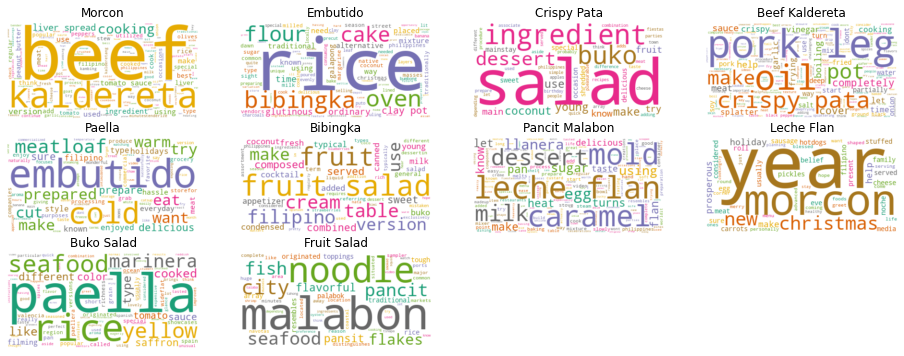

In [15]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Morcon', 'Embutido', 'Crispy Pata', 'Beef Kaldereta', 'Paella', 'Bibingka', 'Pancit Malabon',
             'Leche Flan', 'Buko Salad', 'Fruit Salad']

for index, NocheBuena in enumerate(data.columns):
    wc.generate(data_clean.transcript[NocheBuena])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

In [30]:
unique_list = []
for NocheBuena in data.columns:
    uniques = data[NocheBuena].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['NocheBuenaDish', 'UniqueWords'])
data_unique_sort = data_words.sort_values(by='UniqueWords')
data_unique_sort

,NocheBuenaDish,UniqueWords
2,Crispy Pata,52
7,Leche Flan,53
9,Fruit Salad,58
5,Bibingka,61
4,Paella,82
8,Buko Salad,91
1,Embutido,106
0,Morcon,170
6,Pancit Malabon,185
3,Beef Kaldereta,245


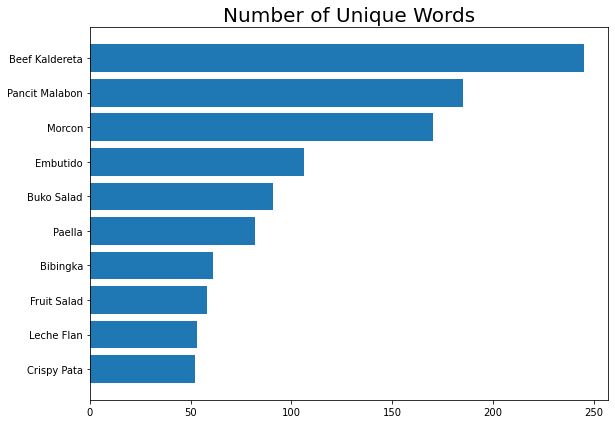

In [31]:
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.UniqueWords, align='center')
plt.yticks(y_pos, data_unique_sort.NocheBuenaDish)
plt.title('Number of Unique Words', fontsize=20)

plt.tight_layout()
plt.show()

In [32]:
print ('Exploration Data Analysis: COMPLETED')

Exploration Data Analysis: COMPLETED
